<a href="https://colab.research.google.com/github/thivyaa-web-dev/-COVID-19-Quizzer-/blob/master/NOx3y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [52]:
from google.colab import files
uploaded = files.upload()

Saving weeklycrct.xlsx to weeklycrct (1).xlsx


In [53]:
df = pd.read_excel ('weeklycrct.xlsx')


In [54]:
df.head()


,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3
0,2016-01-03,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333
1,2016-01-10,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000
2,2016-01-17,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857
3,2016-01-24,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714
4,2016-01-31,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571


In [55]:
df['From Date']=pd.to_datetime(df['From Date'],dayfirst=True,errors='ignore')
df.head()

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3
0,2016-01-03,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333
1,2016-01-10,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000
2,2016-01-17,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857
3,2016-01-24,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714
4,2016-01-31,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571


In [56]:
df.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      2
NOy1         2
NO2y1        2
NOxy1        2
NH3y1        2
SO2y1        2
Ozoney1      2
PM2.5y2      2
NOy2         2
NO2y2        2
NOxy2        2
NH3y2        2
SO2y2        2
Ozoney2      2
PM2.5y3      1
NOy3         1
NO2y3        1
NOxy3        1
NH3y3        1
SO2y3        1
Ozoney3      1
dtype: int64

In [57]:
df.head()

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3
0,2016-01-03,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333
1,2016-01-10,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000
2,2016-01-17,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857
3,2016-01-24,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714
4,2016-01-31,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571


In [58]:
df['From Date']=pd.to_datetime(df['From Date'],dayfirst=True,errors='ignore')
df.head()

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3
0,2016-01-03,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333
1,2016-01-10,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000
2,2016-01-17,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857
3,2016-01-24,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714
4,2016-01-31,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571


In [59]:
df['From Date']=pd.to_datetime(df['From Date'])
df['year'] = df['From Date'].dt.year
df['month'] = df['From Date'].dt.month
df['day'] = df['From Date'].dt.day

In [60]:
df.head()

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,2016-01-03,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,2016-01-10,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,2016-01-17,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,2016-01-24,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,2016-01-31,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31


In [61]:
import datetime as dt


In [62]:
df['From Date']= df['From Date'].map(dt.datetime.toordinal)


In [63]:
df1 =df.loc['0':'207']


In [64]:
df1.head()

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31


In [65]:
df1.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [66]:
df.isnull().sum(axis = 0)

From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      2
NOy1         2
NO2y1        2
NOxy1        2
NH3y1        2
SO2y1        2
Ozoney1      2
PM2.5y2      2
NOy2         2
NO2y2        2
NOxy2        2
NH3y2        2
SO2y2        2
Ozoney2      2
PM2.5y3      1
NOy3         1
NO2y3        1
NOxy3        1
NH3y3        1
SO2y3        1
Ozoney3      1
year         0
month        0
day          0
dtype: int64

In [67]:
df1 = df1.fillna(df1.mean())


In [68]:
df1.isnull().sum(axis = 0)

From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      0
NOy1         0
NO2y1        0
NOxy1        0
NH3y1        0
SO2y1        0
Ozoney1      0
PM2.5y2      0
NOy2         0
NO2y2        0
NOxy2        0
NH3y2        0
SO2y2        0
Ozoney2      0
PM2.5y3      0
NOy3         0
NO2y3        0
NOxy3        0
NH3y3        0
SO2y3        0
Ozoney3      0
year         0
month        0
day          0
dtype: int64

In [69]:
X1 = df1[['From Date', 'PM2.5y1','NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'Ozoney1', 'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2',
       'NH3y2', 'SO2y2', 'Ozoney2', 'PM2.5y3','NOy3', 'NO2y3',
       'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3', 'PM2.5','NO', 'NO2',
       'NOx', 'SO2', 'Ozone', 'year', 'month', 'day']]
Y1 = df1['NOx']

In [70]:
X1


,From Date,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,PM2.5,NO,NO2,NOx,SO2,Ozone,year,month,day
0,735966,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,126.075287,26.302857,137.310000,97.560000,24.267143,21.067143,2016,1,3
1,735973,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,126.114713,39.560794,141.035079,107.217460,36.032540,28.529048,2016,1,10
2,735980,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,126.154138,14.603492,66.203492,47.072540,13.800317,27.758095,2016,1,17
3,735987,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,126.193563,14.217654,57.379990,42.129093,8.517218,28.716454,2016,1,24
4,735994,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,126.232989,28.167895,78.249649,64.528246,8.492638,30.305899,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,101.091429,51.498571,58.585714,64.812857,8.118571,29.711429,2019,11,24
204,737394,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,63.288571,53.741429,50.064286,75.085714,2.608571,19.504286,2019,12,1
205,737401,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,143.041429,60.198571,56.500000,91.804286,6.052857,22.581429,2019,12,8
206,737408,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,139.978571,70.320000,74.011429,98.191429,5.511429,17.747143,2019,12,15


In [71]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [72]:
forest = RandomForestRegressor(n_estimators=2500,
                              max_depth=6,
                              max_features='auto',
                              min_samples_split=6,
                              min_samples_leaf=6,random_state=20)

forest.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=2500, n_jobs=None, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [73]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9960855701991607

Score on test data: 0.8991298213646763

Root Mean Squared Error: 9.801840162636191

Overall model accuracy: 0.8991298213646763


In [74]:
test=df.loc['207':'259']
X=test[['From Date', 'PM2.5y1','NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'Ozoney1', 'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2',
       'NH3y2', 'SO2y2', 'Ozoney2', 'PM2.5y3','NOy3', 'NO2y3',
       'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3', 'PM2.5','NO', 'NO2',
       'NOx', 'SO2', 'Ozone', 'year', 'month', 'day']]
X


,From Date,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,PM2.5,NO,NO2,NOx,SO2,Ozone,year,month,day
207,737415,184.412857,63.055714,42.382857,83.661429,52.088571,8.222857,8.772857,131.211429,40.825714,22.597143,68.484706,33.147143,4.063562,19.851970,190.681429,113.920000,56.500000,122.645714,183.537143,11.882518,15.873813,125.101429,37.271429,35.768571,55.842857,2.812857,12.827143,2019,12,22
208,737422,174.257143,58.454286,43.145714,73.790000,43.584286,8.277143,13.544286,182.091429,48.652857,30.191429,53.797059,37.050000,4.150342,18.792955,248.324286,108.927143,58.957143,119.982857,184.102857,11.956211,15.560072,199.171429,36.488571,33.925714,36.302857,4.218571,11.181429,2019,12,29
209,737429,233.405714,71.600000,47.820000,71.898571,42.145714,7.870000,9.855714,249.337143,152.074286,27.587143,39.109412,68.041429,4.237123,17.733939,370.250000,118.431429,51.620000,112.834768,187.822857,12.029904,15.246331,233.175714,69.484286,50.114286,67.767143,7.714286,12.441429,2020,1,5
210,737436,111.647857,31.458571,50.971429,49.692857,55.980000,7.013810,10.292857,186.350000,66.382143,33.277857,93.540000,45.051429,4.410685,15.615909,190.451429,115.518571,33.870000,80.316892,88.631429,12.103597,14.932590,132.005714,48.794286,34.764286,58.155714,9.812857,14.760000,2020,1,12
211,737443,197.925714,84.207143,50.025714,112.764286,66.097143,6.497778,10.747143,190.755714,59.047143,58.054286,186.177857,37.025000,4.497466,14.556894,162.084286,57.864286,35.365714,85.170541,124.330000,12.177290,14.618849,139.475714,49.977143,19.005714,50.624286,11.672857,9.575714,2020,1,19
212,737450,104.214286,39.715714,22.691429,42.697143,27.531429,6.085556,11.231429,121.235714,48.430000,67.387143,83.062857,37.514286,4.584247,13.497879,137.124286,27.710000,42.278571,90.024189,75.311429,12.250983,14.305108,145.634286,61.420000,19.142857,59.990000,13.358571,15.948571,2020,1,26
213,737457,82.601429,38.091429,22.147143,20.147143,26.835714,8.927702,6.428571,94.792857,64.715714,51.304286,111.304286,49.177143,4.671027,12.438864,95.014286,59.115714,42.094286,94.877838,107.420000,12.324676,13.991367,105.194286,60.642857,22.712857,61.272857,12.934286,13.274286,2020,2,2
214,737464,109.137143,43.834286,22.722857,51.142857,26.304286,18.854348,12.212857,121.200000,123.034286,43.888571,109.128571,75.125714,4.757808,11.379848,85.924286,110.181429,44.972857,99.731486,150.872857,12.398369,13.677626,144.157143,72.502857,25.661429,72.518571,18.720000,12.290000,2020,2,9
215,737471,137.971429,35.642857,25.607857,46.189286,16.212143,28.992174,11.610000,96.080000,61.382857,65.577143,78.358571,32.344286,4.844589,10.320833,46.072857,63.444286,37.480000,104.585135,93.528571,12.472062,13.363885,106.562857,65.061429,24.791429,66.054286,23.615714,19.200000,2020,2,16
216,737478,69.901429,31.515714,30.722857,31.140000,21.278571,25.990062,11.332857,130.018571,140.001429,59.761429,109.277143,76.615714,4.931370,9.261818,139.812857,46.317143,51.255714,109.438784,82.697143,12.545755,13.050144,136.587143,79.278571,28.348571,79.444286,23.447143,19.607143,2020,2,23


In [75]:
predict=forest.predict(X)


In [76]:
predict


array([55.83253121, 31.46505745, 69.00076811, 57.48759881, 51.17558579,
       59.504421  , 60.03435218, 71.48016661, 67.18005285, 80.09731966,
       76.80686416, 86.48039561, 70.56995079, 72.20323987, 54.1333827 ,
       34.72408705, 44.14309168, 44.21577893, 45.21366033, 46.30096329,
       44.77474161, 43.45841285, 57.58436184, 47.63427413, 45.08170065,
       46.17878354, 44.35158813, 39.71054681, 45.1428754 , 33.58961617,
       44.91223715, 46.21934219, 55.32969053, 54.15238949, 61.30998096,
       61.86564087, 66.46430536, 42.74416507, 31.17353939, 31.17824352,
       31.24529503, 31.24529503, 31.55696414, 43.33729306, 51.19250255,
       47.33270071, 86.4977938 , 83.01310464, 34.7179618 , 53.64499642,
       67.17607889, 55.73762459, 31.24154003])

In [77]:
dates=df.loc['207':'259','From Date']


In [78]:
dates


207    737415
208    737422
209    737429
210    737436
211    737443
212    737450
213    737457
214    737464
215    737471
216    737478
217    737485
218    737492
219    737499
220    737506
221    737513
222    737520
223    737527
224    737534
225    737541
226    737548
227    737555
228    737562
229    737569
230    737576
231    737583
232    737590
233    737597
234    737604
235    737611
236    737618
237    737625
238    737632
239    737639
240    737646
241    737653
242    737660
243    737667
244    737674
245    737681
246    737688
247    737695
248    737702
249    737709
250    737716
251    737723
252    737730
253    737737
254    737744
255    737751
256    737758
257    737765
258    737772
259    737779
Name: From Date, dtype: int64

In [79]:
X['From Date']=dates.values


In [80]:
X.columns


Index(['From Date', 'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1',
       'Ozoney1', 'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'Ozoney2', 'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3',
       'Ozoney3', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'Ozone', 'year', 'month',
       'day'],
      dtype='object')

In [81]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)


In [82]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)


In [83]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])

In [84]:
X['pred']=predict


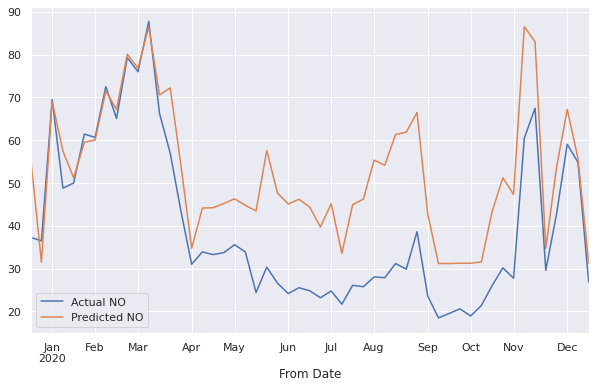

In [85]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')

In [86]:
np.sqrt(mean_squared_error(test['NO'],X['pred']))


15.830852817489793

In [87]:
from sklearn import metrics


In [88]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 6.26865028671014
MSE: 96.07607057386788
RMSE: 9.801840162636191
R-Squared: 0.8991298213646763


In [89]:
mae = metrics.mean_absolute_error(test['NO'],X['pred'])
mse = metrics.mean_squared_error(test['NO'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.144923794116105
MSE: 250.61590092902452
RMSE: 15.830852817489793
R-Squared: 0.2504699334485889


In [90]:
import pickle
filename = 'NH3_forest3y.sav'
pickle.dump(forest, open(filename, 'wb'))

In [91]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8991298213646763


3rd plot

In [92]:
testcase = pd.DataFrame()


In [93]:
testcase['test']=ytest
testcase['pred']=forest_pred


In [94]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

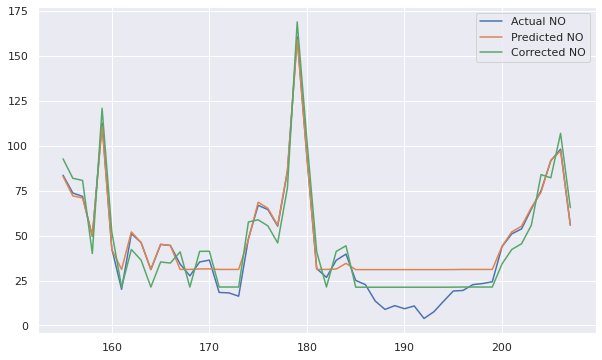

In [95]:
testcase['test'].plot(legend=True, label='Actual NO', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted NO')
testcase["Corrected"].plot(legend=True, label='Corrected NO')

In [96]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.928078522479192

In [97]:
test2020=pd.DataFrame()


In [98]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [99]:
test2020.index=test.index


In [100]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

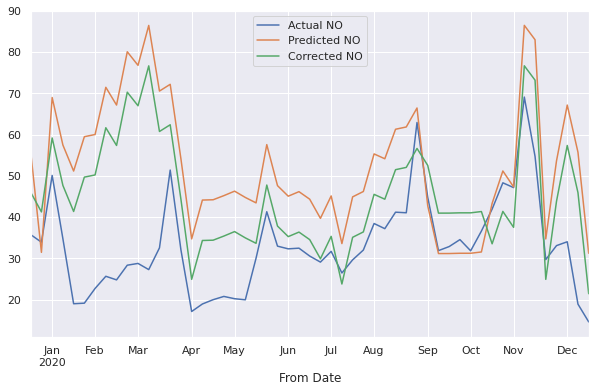

In [101]:
test2020['test'].plot(legend=True, label='Actual NO', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO')
test2020["Corrected"].plot(legend=True, label='Corrected NO')

In [102]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

-0.730907135029075